In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:

data = { 'height': [30, 45, 35, 50, 20, 25, 40, 55, 32, 43, 36, 53, 19, 24, 40, 54, 32, 44, 35, 52], 
        'weight': [5, 20, 15, 25, 3, 7, 18, 30, 3, 21, 15, 24, 4, 6, 20, 31, 5, 21, 16, 24], 
        'fur_length': [1, 2, 1, 3, 1, 1, 2, 3, 1, 2, 1, 3, 1, 1, 2, 3, 1, 2, 1, 3], # 1: Short, 2: Medium, 3: Long
        'ear_shape': [0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0], # 0: Pointed, 1: Floppy
        'animal_type': [0, 1, 1, 2, 0, 0, 2, 2, 0, 1, 1, 2, 0, 0, 2, 2, 0, 1, 1, 2] # 0: Rabbit, 1: Dog, 2: Bear 
       }

df=pd.DataFrame(data)
print(df.head())

   height  weight  fur_length  ear_shape  animal_type
0      30       5           1          0            0
1      45      20           2          1            1
2      35      15           1          1            1
3      50      25           3          0            2
4      20       3           1          0            0


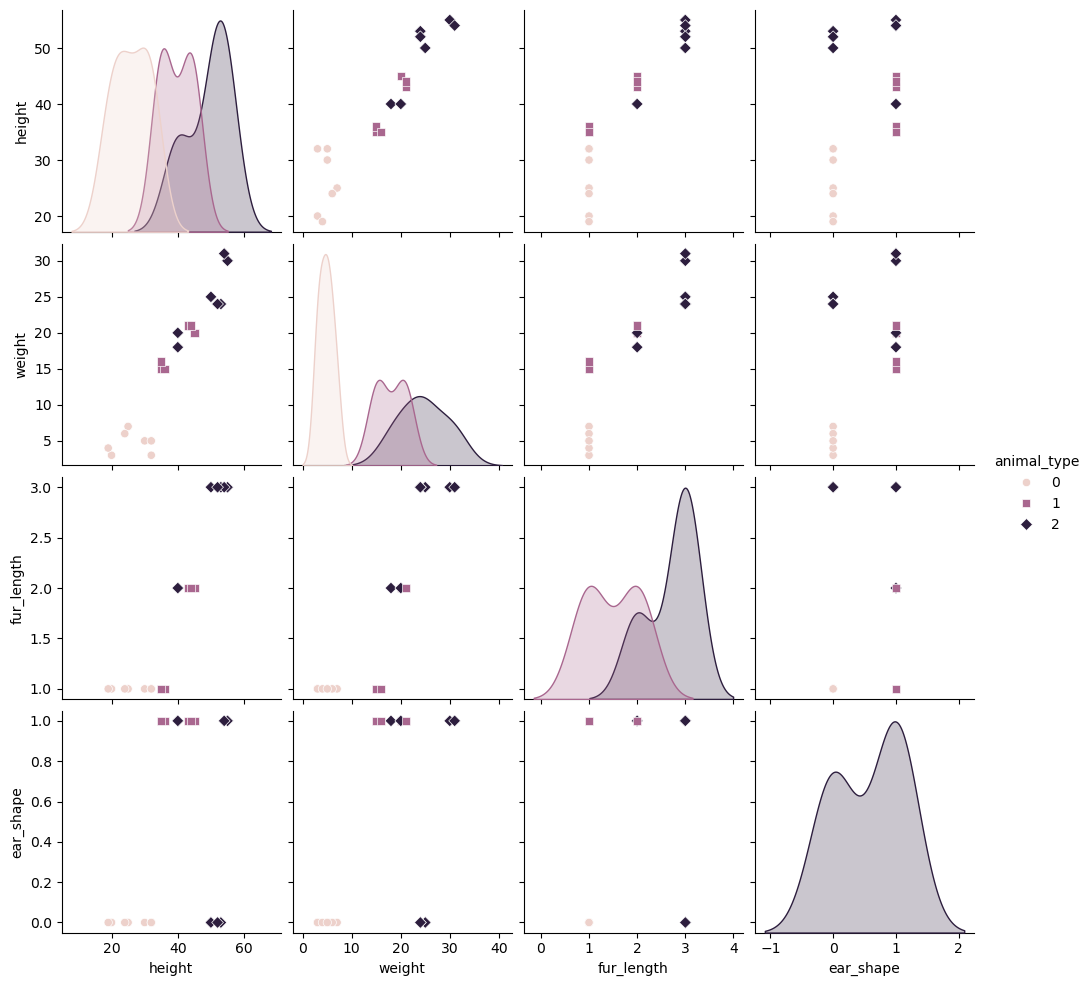

In [7]:
sns.pairplot(df, hue="animal_type", markers=["o", "s", "D"], diag_kind="kde")

In [11]:
X=df.drop("animal_type", axis=1)
y=df["animal_type"]

scaler=StandardScaler()
X_scaled= scaler.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [13]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_test)

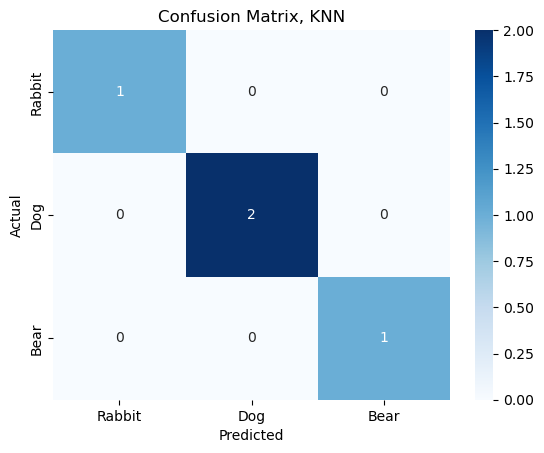

K-Nearest Neigbors, Results:
accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [16]:
knn_cm= confusion_matrix(y_test, y_pred_knn)
sns.heatmap(knn_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Rabbit", "Dog", "Bear"], yticklabels=["Rabbit", "Dog", "Bear"])
plt.title("Confusion Matrix, KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("K-Nearest Neigbors, Results:")
print(f"accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(classification_report(y_test, y_pred_knn))

In [19]:
forest=RandomForestClassifier(n_estimators=10)
forest.fit(X_train, y_train)
y_pred_forest=forest.predict(X_test)

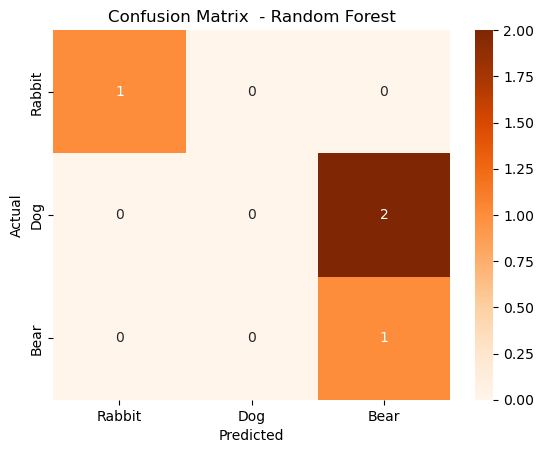

Random Forest Results:
Accuracy : 0.5
              precision    recall  f1-score   support

      Rabbit       1.00      1.00      1.00         1
         Dog       0.00      0.00      0.00         2
        Bear       0.33      1.00      0.50         1

    accuracy                           0.50         4
   macro avg       0.44      0.67      0.50         4
weighted avg       0.33      0.50      0.38         4



C:\Users\hrmoh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hrmoh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hrmoh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
cm_forest=confusion_matrix(y_test, y_pred_forest)
sns.heatmap(cm_forest, annot=True, fmt="d", xticklabels=["Rabbit", "Dog", "Bear"], yticklabels=["Rabbit", "Dog", "Bear"], cmap="Oranges")
plt.title("Confusion Matrix  - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Random Forest Results:")
print(f"Accuracy : {accuracy_score(y_test, y_pred_forest)}")
print(classification_report(y_test, y_pred_forest, target_names=["Rabbit", "Dog", "Bear"]))